In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from datetime import datetime
import os
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import numpy as np

In [4]:
postgres_pwd=os.environ['LHL_DATABASE']

In [10]:
con = psycopg2.connect(database='mid_term_project', 
                       user='lhl_student',
                       password = postgres_pwd,
                       host='mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com',
                       port='5432')

query = con.cursor()

In [11]:
# query.close()

In [12]:
query.execute("""
select *
from flights
where fl_date LIKE '2019%'
limit 500000 """)

response = query.fetchall()
cols1 = [column[0] for column in query.description]

In [14]:
# flights_500 = pd.DataFrame(response,columns= cols1)
# flights_500.to_csv('flights_500_19.csv',index = False)

In [5]:
with open('flights_500_19.csv')as g:
    flights_19 = pd.read_csv(g)

In [6]:
headers = flights_19.columns.to_list()


In [7]:
with open('sample.csv')as f:
    flights = pd.read_csv(f,names=headers,header= None)

In [8]:
print(flights.shape)
flights.head()

(1000000, 42)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-09-03,DL,DL,DL,2391,DL,N350NA,2391,10721,BOS,...,1124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-06-04,UA,UA_CODESHARE,UA,4039,EV,N11539,4039,14633,RST,...,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-11,WN,WN,WN,6354,WN,N723SW,6354,12889,LAS,...,628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-04-12,WN,WN,WN,1082,WN,N7709A,1082,14107,PHX,...,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-11-05,G4,G4,G4,1692,G4,247NV,1692,14082,PGD,...,890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
columns_test = ['fl_date','mkt_carrier','mkt_carrier_fl_num','tail_num','origin_airport_id',
                'origin_city_name','dest_airport_id','dest_city_name','crs_dep_time','crs_arr_time'
                ,'crs_elapsed_time','distance','dep_delay']

In [2]:
len(columns_test)

13

In [9]:
test = flights[columns_test]
test.head()

,fl_date,mkt_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,dep_delay
0,2018-09-03,DL,2391,N350NA,10721,"Boston, MA",13487,"Minneapolis, MN",1626,1839,193.0,1124,-6.0
1,2019-06-04,UA,4039,N11539,14633,"Rochester, MN",13930,"Chicago, IL",530,659,89.0,268,-6.0
2,2018-09-11,WN,6354,N723SW,12889,"Las Vegas, NV",11292,"Denver, CO",1955,2240,105.0,628,-6.0
3,2018-04-12,WN,1082,N7709A,14107,"Phoenix, AZ",12191,"Houston, TX",530,955,145.0,1020,-2.0
4,2018-11-05,G4,1692,247NV,14082,"Punta Gorda, FL",12917,"Columbus, OH",1228,1449,141.0,890,-2.0


In [10]:
test=test.dropna().reset_index(drop = True)

In [22]:
test.head()
# plt.figure(figsize=(8,6))
# sns.boxplot(x="variable", y="value", data=pd.melt(df_sca))
# plt.show()

,fl_date,mkt_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,dep_delay
0,2018-09-03,DL,2391,N350NA,10721,"Boston, MA",13487,"Minneapolis, MN",1626,1839,193.0,1124,-6.0
1,2019-06-04,UA,4039,N11539,14633,"Rochester, MN",13930,"Chicago, IL",530,659,89.0,268,-6.0
2,2018-09-11,WN,6354,N723SW,12889,"Las Vegas, NV",11292,"Denver, CO",1955,2240,105.0,628,-6.0
3,2018-04-12,WN,1082,N7709A,14107,"Phoenix, AZ",12191,"Houston, TX",530,955,145.0,1020,-2.0
4,2018-11-05,G4,1692,247NV,14082,"Punta Gorda, FL",12917,"Columbus, OH",1228,1449,141.0,890,-2.0


In [11]:
test['origin_state'] = test.origin_city_name.str.split(',').str[1]
test['origin_state'] = test['origin_state'].str.strip(' ')

In [12]:
def label_states(x):
    if x in ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'PA', 'ND','NJ']:
        'North-East'
        return 1
    elif x in ['ND', 'SD', 'NE', 'MN', 'IA', 'MO', 'WI', 'IL', 'IN', 'MI', 'OH', 'KS']:
#         Nebraska NB or NE'Midwest'
        return 2
    elif x in ['DE','DC','VI','MD', 'WV', 'VA','PR','NC', 'KY', 'SC', 'TN', 'GA', 'FL', 'AL', 'AR', 'OK', 'TX', 'LA','MS']:
#         South'
        return 3
    elif x in ['WA','OR', 'CA', 'AK', 'NV', 'ID', 'MT', 'WY', 'UT', 'AZ', 'NM', 'CO','HI','TT']:
#         west
        return 4
    return 1000

In [13]:
test['origin_state_region']= test['origin_state'].apply(lambda x:label_states(x))

In [14]:
test['origin_state_region'].value_counts()

3    381208
4    288003
2    180943
1    133154
Name: origin_state_region, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [16]:
labelenmkt = LabelEncoder()
labelentail = LabelEncoder()

In [17]:
test['mkt_carrier_Cat'] = labelenmkt.fit_transform(test['mkt_carrier'])
test['tail_num_Cat'] = labelentail.fit_transform(test['tail_num'])

In [30]:
print(labelenmkt.classes_)
print(len(labelentail.classes_))

['AA' 'AS' 'B6' 'DL' 'F9' 'G4' 'HA' 'NK' 'UA' 'VX' 'WN']
6443


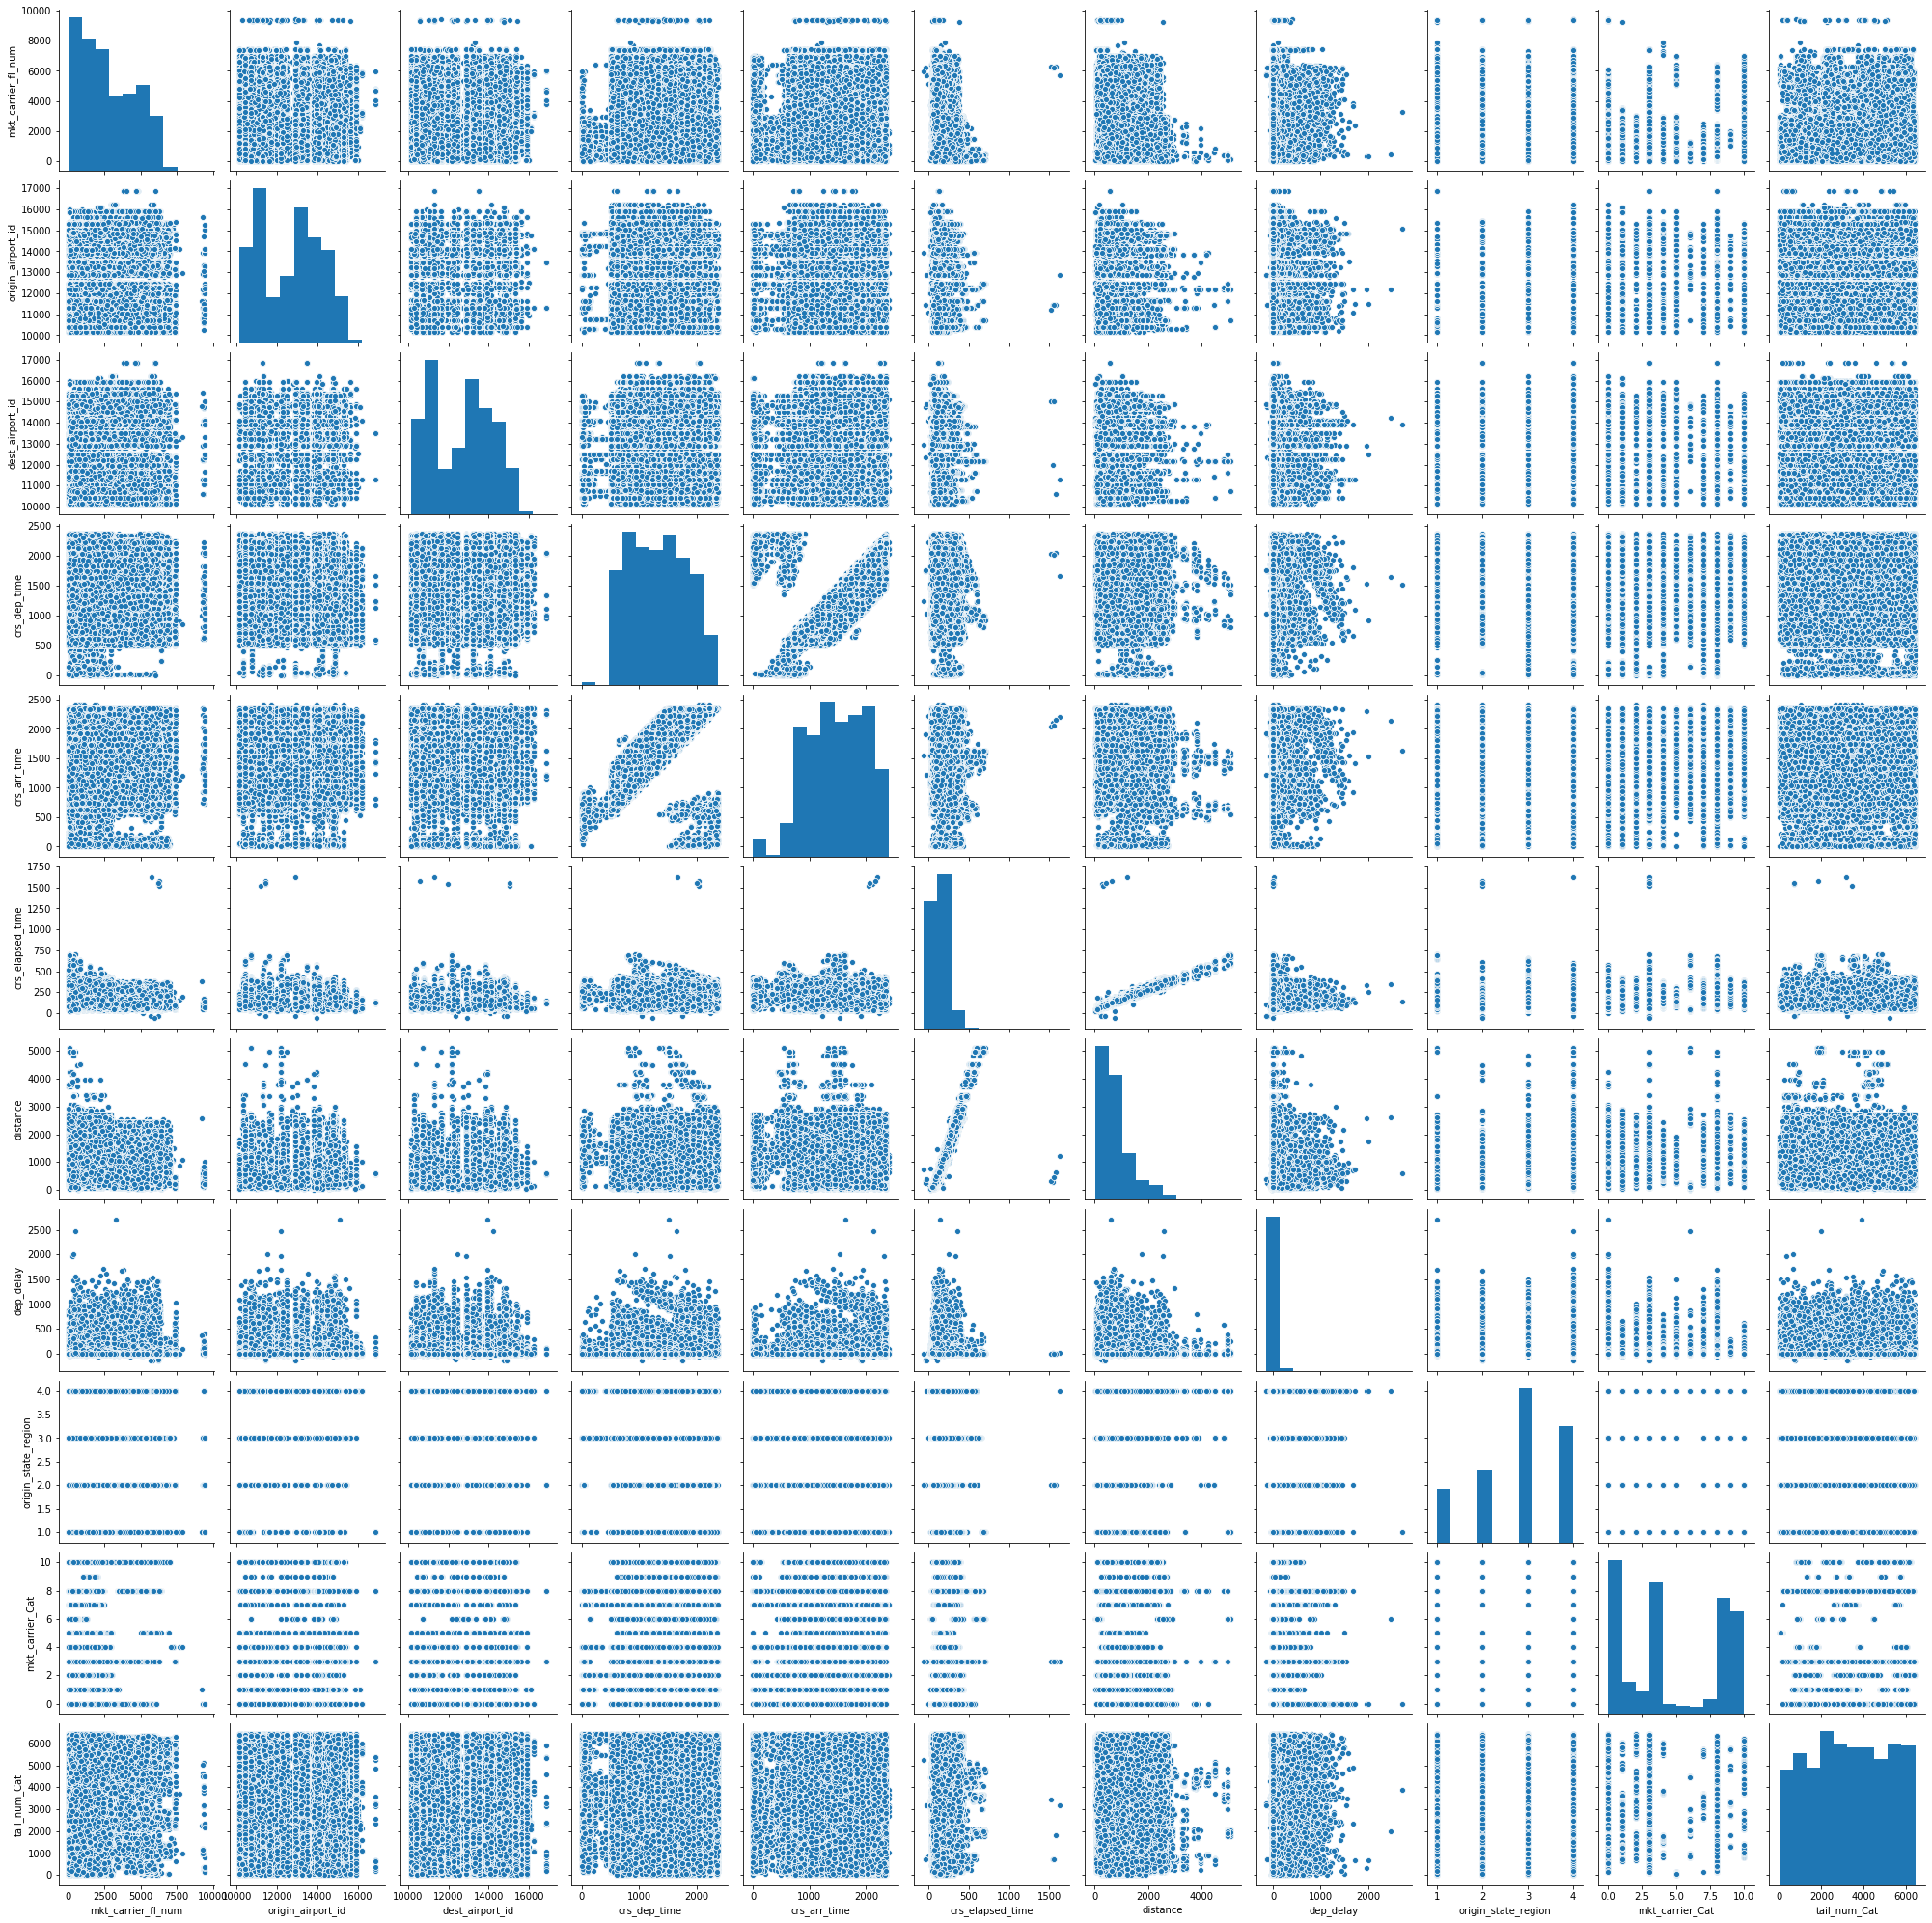

In [18]:
sns.pairplot(test._get_numeric_data())
plt.show();

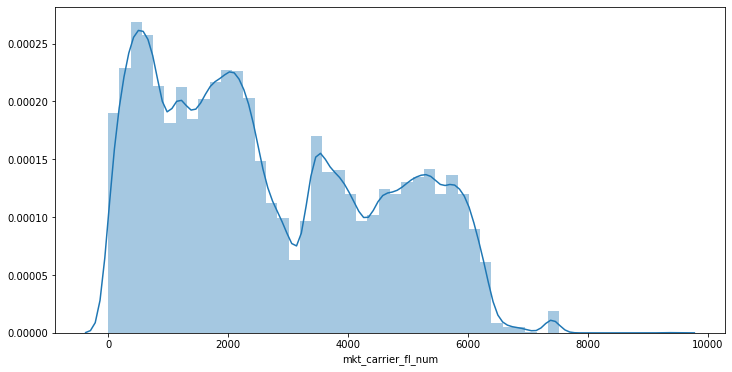

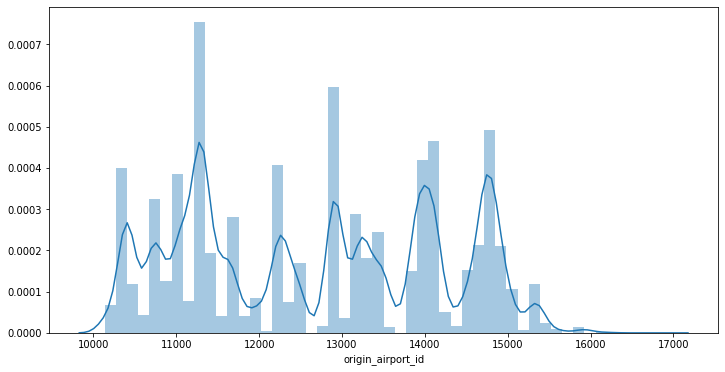

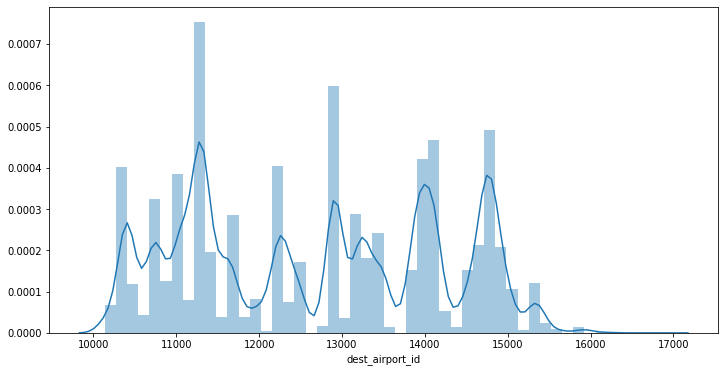

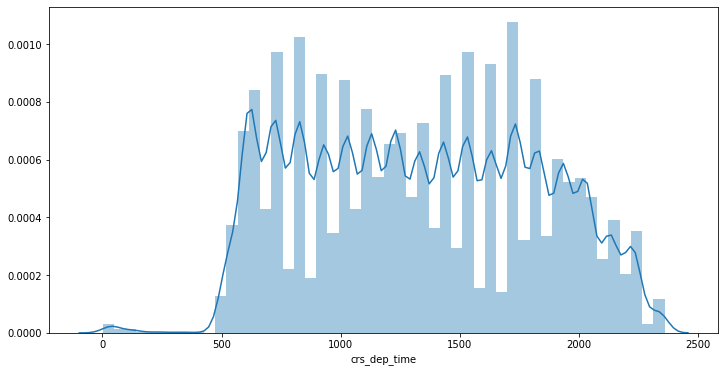

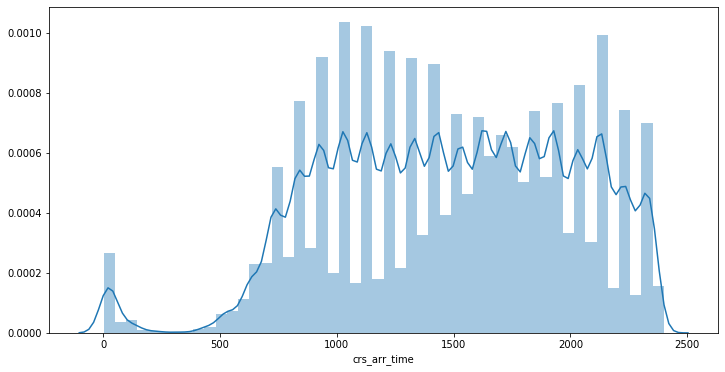

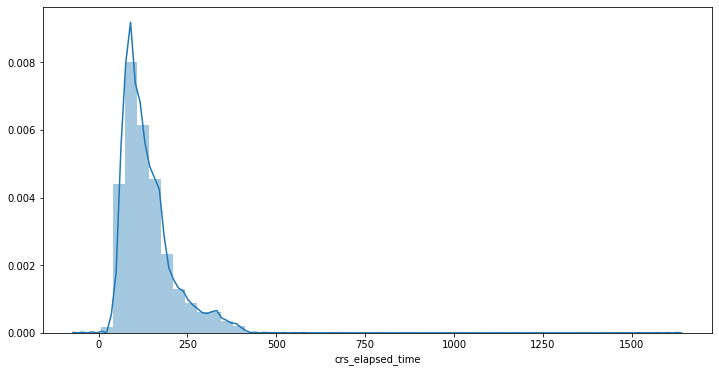

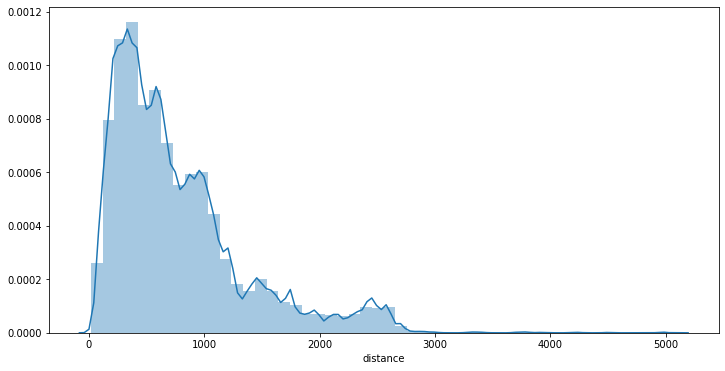

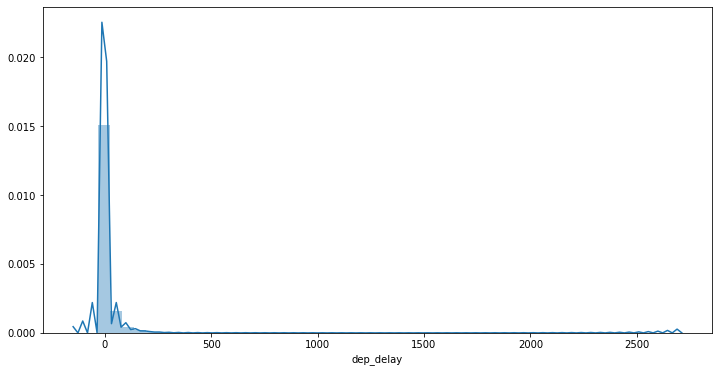

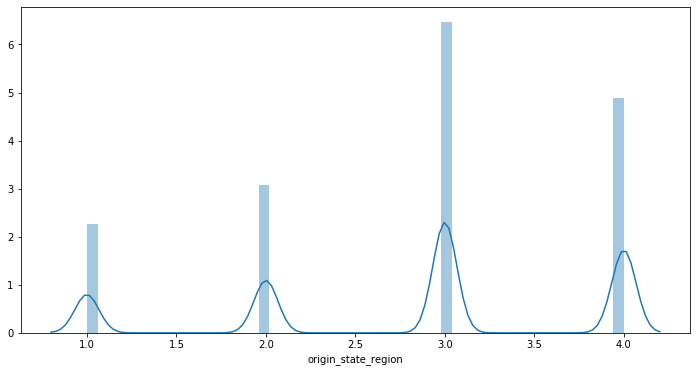

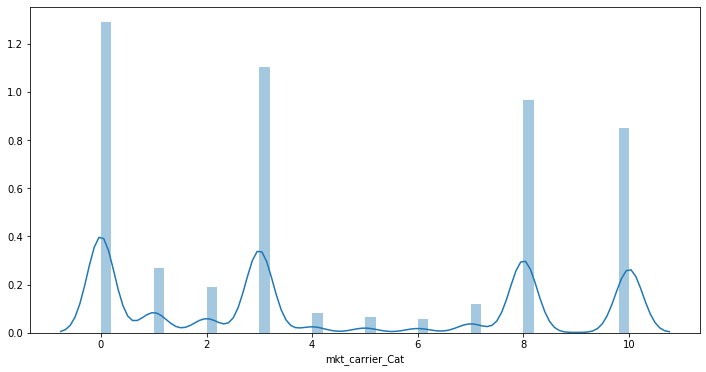

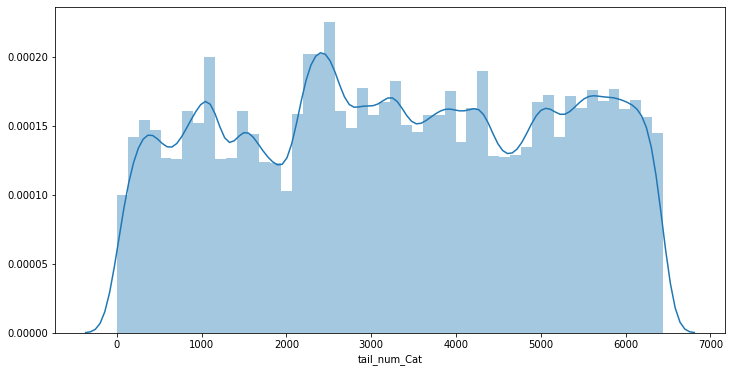

In [31]:
for cl in test._get_numeric_data().columns:
    # histogram (withou extreme values)
    plt.figure(figsize=(12, 6))
    sns.distplot(test[cl])
    plt.show()

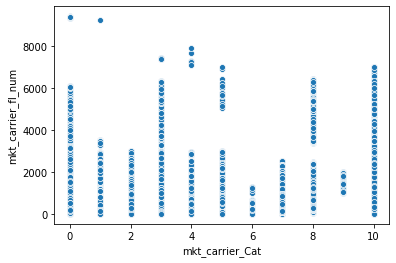

In [32]:
sns.scatterplot(y='mkt_carrier_fl_num',x='mkt_carrier_Cat',data=test)
plt.show();

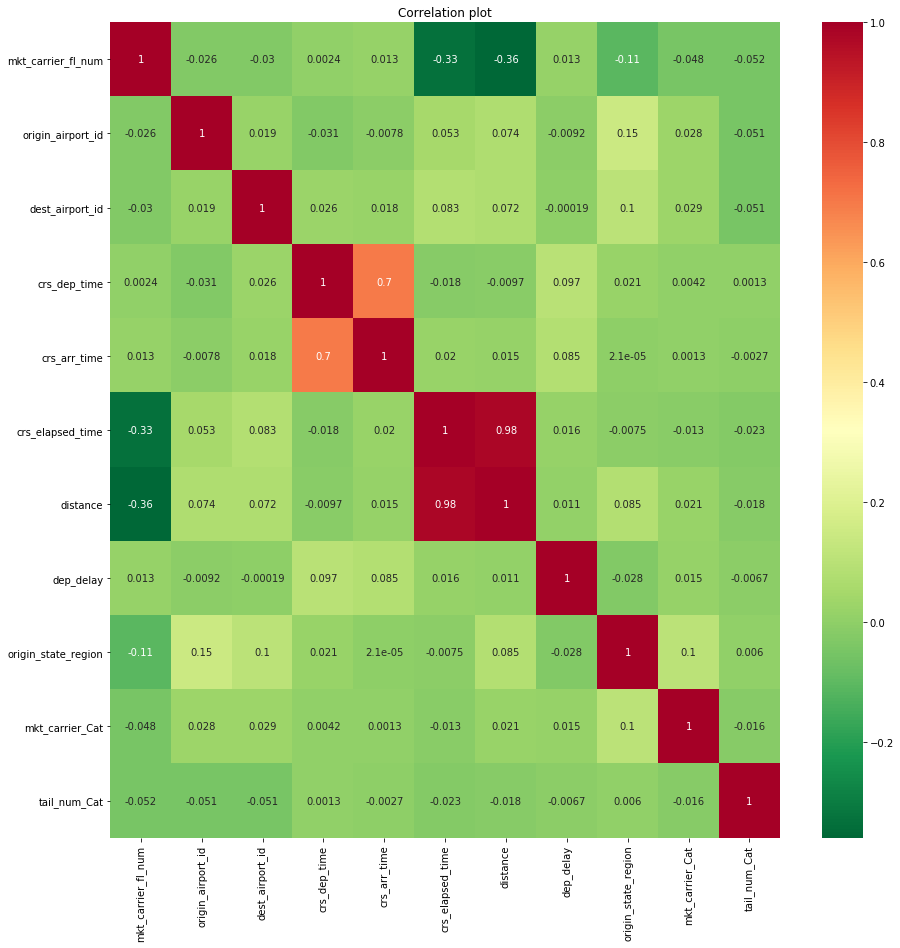

In [19]:
plt.figure(figsize=(15,15))
df_corr = test._get_numeric_data().corr()
# plot the correlations
sns.heatmap(df_corr,annot=True,cmap="RdYlGn_r")
plt.title('Correlation plot')
plt.savefig('heatmap.png', bbox_inches='tight')  
plt.show;

In [20]:
a = test._get_numeric_data().columns.to_list()
a.append('fl_date')

In [138]:
df = test[a]
df = df.drop(columns='distance')
df.head()

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,dep_delay,origin_state_region,mkt_carrier_Cat,tail_num_Cat,fl_date
0,2391,10721,13487,1626,1839,193.0,-6.0,1,3,1730,2018-09-03
1,4039,14633,13930,530,659,89.0,-6.0,2,8,220,2019-06-04
2,6354,12889,11292,1955,2240,105.0,-6.0,4,10,3860,2018-09-11
3,1082,14107,12191,530,955,145.0,-2.0,4,10,4131,2018-04-12
4,1692,14082,12917,1228,1449,141.0,-2.0,3,5,28,2018-11-05


In [139]:
df['fl_date'] = pd.to_datetime(df.fl_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983308 entries, 0 to 983307
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   mkt_carrier_fl_num   983308 non-null  int64         
 1   origin_airport_id    983308 non-null  int64         
 2   dest_airport_id      983308 non-null  int64         
 3   crs_dep_time         983308 non-null  int64         
 4   crs_arr_time         983308 non-null  int64         
 5   crs_elapsed_time     983308 non-null  float64       
 6   dep_delay            983308 non-null  float64       
 7   origin_state_region  983308 non-null  int64         
 8   mkt_carrier_Cat      983308 non-null  int32         
 9   tail_num_Cat         983308 non-null  int32         
 10  fl_date              983308 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), int64(6)
memory usage: 75.0 MB


In [140]:
# 0 is for monday and 6 is sunday
df['month'] = df.fl_date.dt.month
df['dayof_theweek'] = df.fl_date.dt.dayofweek
df['year'] = df.fl_date.dt.year
df['day'] = df.fl_date.dt.day
df["WEEKEND"] = ((df.fl_date.dt.dayofweek) // 5 == 1).astype(float)

In [24]:
df.head()

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,dep_delay,origin_state_region,mkt_carrier_Cat,tail_num_Cat,fl_date,month,dayof_theweek,year,WEEKEND
0,2391,10721,13487,1626,1839,193.0,-6.0,1,3,1730,2018-09-03,9,0,2018,0.0
1,4039,14633,13930,530,659,89.0,-6.0,2,8,220,2019-06-04,6,1,2019,0.0
2,6354,12889,11292,1955,2240,105.0,-6.0,4,10,3860,2018-09-11,9,1,2018,0.0
3,1082,14107,12191,530,955,145.0,-2.0,4,10,4131,2018-04-12,4,3,2018,0.0
4,1692,14082,12917,1228,1449,141.0,-2.0,3,5,28,2018-11-05,11,0,2018,0.0


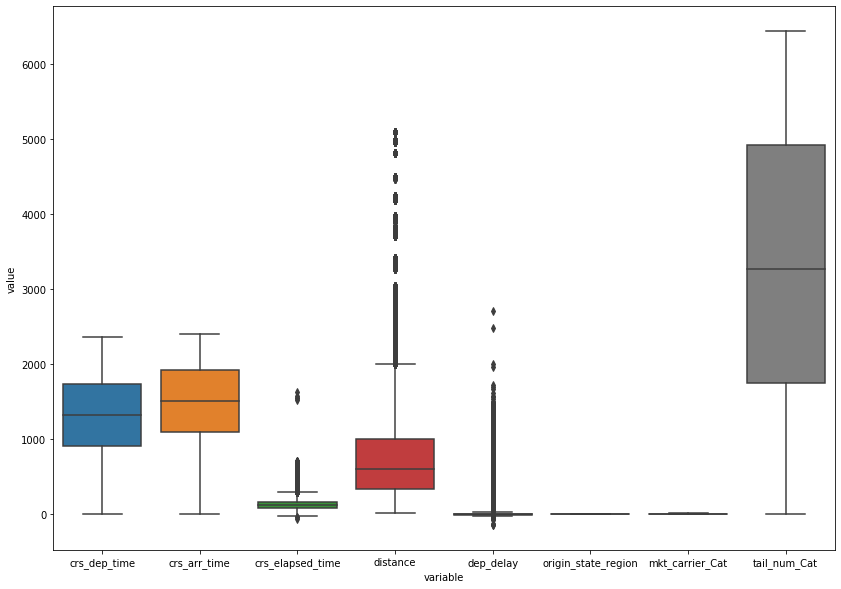

In [30]:
plt.figure(figsize=(14,10))
sns.boxplot(x="variable", y="value", data=pd.melt(test.drop(columns=
                                                          ['mkt_carrier_fl_num','origin_airport_id','dest_airport_id'])\
                                                          ._get_numeric_data()))
plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983308 entries, 0 to 983307
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   mkt_carrier_fl_num   983308 non-null  int64         
 1   origin_airport_id    983308 non-null  int64         
 2   dest_airport_id      983308 non-null  int64         
 3   crs_dep_time         983308 non-null  int64         
 4   crs_arr_time         983308 non-null  int64         
 5   crs_elapsed_time     983308 non-null  float64       
 6   dep_delay            983308 non-null  float64       
 7   origin_state_region  983308 non-null  int64         
 8   mkt_carrier_Cat      983308 non-null  int32         
 9   tail_num_Cat         983308 non-null  int32         
 10  fl_date              983308 non-null  datetime64[ns]
 11  month                983308 non-null  int64         
 12  dayof_theweek        983308 non-null  int64         
 13  year          

In [141]:
#select airport and there max traffic line
# step1 = df.groupby(by=['origin_airport_id','mkt_carrier_Cat'],as_index= False)\
#                                 .agg({'dest_airport_id':'count'})\
#                                 .rename(columns={'dest_airport_id':'count'})\
#                                 .sort_values('count', ascending=False)\
#                                 .drop_duplicates(['origin_airport_id'])
step1 = df.groupby(by=['origin_airport_id','mkt_carrier_Cat'],as_index= False)\
                                .agg({'dest_airport_id':'count'})\
                                .rename(columns={'dest_airport_id':'Nos_flight/carrier in airport'})

step1.head()

,origin_airport_id,mkt_carrier_Cat,Nos_flight/carrier in airport
0,10135,0,269
1,10135,3,213
2,10135,5,115
3,10135,8,81
4,10136,0,271


In [142]:
step2 = df.groupby(by=['origin_airport_id'],as_index= False)\
                                        .agg({'dest_airport_id':'count'})\
                                        .rename(columns={'dest_airport_id':'Nos flight per airport'})
step2.head()

,origin_airport_id,Nos flight per airport
0,10135,678
1,10136,271
2,10140,3452
3,10141,101
4,10146,133


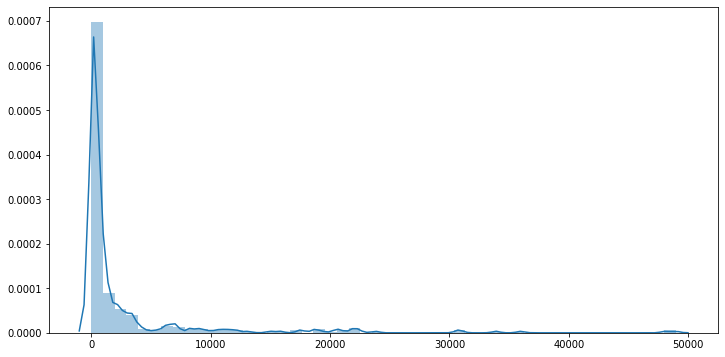

In [42]:
plt.figure(figsize=(12, 6))
sns.distplot(df.groupby(by=['origin_airport_id'],as_index= True).agg({'origin_airport_id':'count'}))
plt.show()

In [43]:
step2.head()

,origin_airport_id,Nos flight per airport
0,10135,678
1,10136,271
2,10140,3452
3,10141,101
4,10146,133


In [33]:
df.head()

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,dep_delay,origin_state_region,mkt_carrier_Cat,tail_num_Cat,fl_date,month,dayof_theweek,year,WEEKEND
0,2391,10721,13487,1626,1839,193.0,-6.0,1,3,1730,2018-09-03,9,0,2018,0.0
1,4039,14633,13930,530,659,89.0,-6.0,2,8,220,2019-06-04,6,1,2019,0.0
2,6354,12889,11292,1955,2240,105.0,-6.0,4,10,3860,2018-09-11,9,1,2018,0.0
3,1082,14107,12191,530,955,145.0,-2.0,4,10,4131,2018-04-12,4,3,2018,0.0
4,1692,14082,12917,1228,1449,141.0,-2.0,3,5,28,2018-11-05,11,0,2018,0.0


In [143]:
new_df = pd.merge(df,step1,  how='inner', left_on=['origin_airport_id','mkt_carrier_Cat'],
                  right_on = ['origin_airport_id','mkt_carrier_Cat'])
new_df = pd.merge(new_df,step2,  how='inner', on='origin_airport_id')
print(new_df.shape)
print(df.shape)

(983308, 18)
(983308, 16)


In [35]:
new_df.columns

Index(['mkt_carrier_fl_num', 'origin_airport_id', 'dest_airport_id',
       'crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'dep_delay',
       'origin_state_region', 'mkt_carrier_Cat', 'tail_num_Cat', 'fl_date',
       'month', 'dayof_theweek', 'year', 'WEEKEND',
       'Nos_flight/carrier in airport', 'Nos flight per airport'],
      dtype='object')

In [36]:
def periodof_day(x):
    if  x >= 500 and x < 1200:
        return 1
    elif x >= 1200 and x < 1700:
        return 2
    elif x >= 1700 and x < 2100: 
        return 3
    return 4
# small,medium,large,Xlarge
def airport_size(x):
    if   x < 116:
        return 1
    elif x >= 116 and x < 407:
        return 2
    elif x >= 407 and x < 1518: 
        return 3
    return 4

def airline_size(x):
    if   x < 82:
        return 1
    elif x >= 82 and x < 198:
        return 2
    elif x >= 198 and x < 532: 
        return 3
    return 4

In [144]:
# for binning
new_df['Nos flight per airport']= new_df['Nos flight per airport'].apply(lambda x:airport_size(x))
new_df['Nos_flight/carrier in airport']= new_df['Nos_flight/carrier in airport'].apply(lambda x:airline_size(x))
new_df['periodof_day']= new_df.crs_dep_time.apply(lambda x:periodof_day(x))
print(new_df.shape)
new_df.head()

(983308, 19)


,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,dep_delay,origin_state_region,mkt_carrier_Cat,tail_num_Cat,fl_date,month,dayof_theweek,year,day,WEEKEND,Nos_flight/carrier in airport,Nos flight per airport,periodof_day
0,2391,10721,13487,1626,1839,193.0,-6.0,1,3,1730,2018-09-03,9,0,2018,3,0.0,4,4,2
1,2213,10721,10397,1600,1900,180.0,-3.0,1,3,1822,2019-12-14,12,5,2019,14,1.0,4,4,2
2,5269,10721,14122,635,833,118.0,-17.0,1,3,380,2019-04-09,4,1,2019,9,0.0,4,4,1
3,2488,10721,14771,735,1118,403.0,-4.0,1,3,3610,2019-06-26,6,2,2019,26,0.0,4,4,1
4,2651,10721,14747,710,1041,391.0,20.0,1,3,1961,2018-01-06,1,5,2018,6,1.0,4,4,1


In [38]:
new_df.columns

Index(['mkt_carrier_fl_num', 'origin_airport_id', 'dest_airport_id',
       'crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'dep_delay',
       'origin_state_region', 'mkt_carrier_Cat', 'tail_num_Cat', 'fl_date',
       'month', 'dayof_theweek', 'year', 'WEEKEND',
       'Nos_flight/carrier in airport', 'Nos flight per airport',
       'periodof_day'],
      dtype='object')

In [145]:
new_df = pd.get_dummies(new_df,columns=['periodof_day'])
new_df = pd.get_dummies(new_df,columns=['dayof_theweek'])
new_df = pd.get_dummies(new_df,columns=['Nos flight per airport'])
new_df = pd.get_dummies(new_df,columns=['Nos_flight/carrier in airport'])
new_df = pd.get_dummies(new_df,columns=['origin_state_region'])
new_df = pd.get_dummies(new_df,columns=['WEEKEND'])
# new_df = pd.get_dummies(new_df,columns=['month'])


In [60]:
new_df.head()

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,dep_delay,origin_state_region,mkt_carrier_Cat,tail_num_Cat,...,dayof_theweek_5,dayof_theweek_6,Nos flight per airport_1,Nos flight per airport_2,Nos flight per airport_3,Nos flight per airport_4,Nos_flight/carrier in airport_1,Nos_flight/carrier in airport_2,Nos_flight/carrier in airport_3,Nos_flight/carrier in airport_4
0,2391,10721,13487,1626,1839,193.0,-6.0,1,3,1730,...,0,0,0,0,0,1,0,0,0,1
1,2213,10721,10397,1600,1900,180.0,-3.0,1,3,1822,...,1,0,0,0,0,1,0,0,0,1
2,5269,10721,14122,635,833,118.0,-17.0,1,3,380,...,0,0,0,0,0,1,0,0,0,1
3,2488,10721,14771,735,1118,403.0,-4.0,1,3,3610,...,0,0,0,0,0,1,0,0,0,1
4,2651,10721,14747,710,1041,391.0,20.0,1,3,1961,...,1,0,0,0,0,1,0,0,0,1


In [41]:
new_df.columns

Index(['mkt_carrier_fl_num', 'origin_airport_id', 'dest_airport_id',
       'crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'dep_delay',
       'origin_state_region', 'tail_num_Cat', 'fl_date', 'month', 'year',
       'WEEKEND', 'periodof_day', 'mkt_carrier_Cat_0', 'mkt_carrier_Cat_1',
       'mkt_carrier_Cat_2', 'mkt_carrier_Cat_3', 'mkt_carrier_Cat_4',
       'mkt_carrier_Cat_5', 'mkt_carrier_Cat_6', 'mkt_carrier_Cat_7',
       'mkt_carrier_Cat_8', 'mkt_carrier_Cat_9', 'mkt_carrier_Cat_10',
       'dayof_theweek_0', 'dayof_theweek_1', 'dayof_theweek_2',
       'dayof_theweek_3', 'dayof_theweek_4', 'dayof_theweek_5',
       'dayof_theweek_6', 'Nos flight per airport_1',
       'Nos flight per airport_2', 'Nos flight per airport_3',
       'Nos flight per airport_4', 'Nos_flight/carrier in airport_1',
       'Nos_flight/carrier in airport_2', 'Nos_flight/carrier in airport_3',
       'Nos_flight/carrier in airport_4'],
      dtype='object')

In [146]:
sc= preprocessing.Normalizer()
new_sam = sc.fit_transform(new_df._get_numeric_data())
df_sca=pd.DataFrame(new_sam, columns = new_df._get_numeric_data().columns)
df_sca.head()

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,dep_delay,mkt_carrier_Cat,tail_num_Cat,month,...,Nos_flight/carrier in airport_1,Nos_flight/carrier in airport_2,Nos_flight/carrier in airport_3,Nos_flight/carrier in airport_4,origin_state_region_1,origin_state_region_2,origin_state_region_3,origin_state_region_4,WEEKEND_0.0,WEEKEND_1.0
0,0.134571,0.603405,0.759082,0.091515,0.103504,0.010863,-0.000338,0.000169,0.097369,0.000507,...,0.0,0.0,0.0,0.000056,0.000056,0.0,0.0,0.0,0.000056,0.000000
1,0.142394,0.689837,0.668989,0.102951,0.122254,0.011582,-0.000193,0.000193,0.117236,0.000772,...,0.0,0.0,0.0,0.000064,0.000064,0.0,0.0,0.0,0.000000,0.000064
2,0.282665,0.575148,0.757601,0.034066,0.044688,0.006330,-0.000912,0.000161,0.020386,0.000215,...,0.0,0.0,0.0,0.000054,0.000054,0.0,0.0,0.0,0.000054,0.000000
3,0.131426,0.566327,0.780264,0.038826,0.059057,0.021288,-0.000211,0.000158,0.190695,0.000317,...,0.0,0.0,0.0,0.000053,0.000053,0.0,0.0,0.0,0.000053,0.000000
4,0.141884,0.573799,0.789275,0.038000,0.055715,0.020927,0.001070,0.000161,0.104955,0.000054,...,0.0,0.0,0.0,0.000054,0.000054,0.0,0.0,0.0,0.000000,0.000054


In [45]:
test1 = test[(test.dep_delay < 200) & (test.dep_delay > -50)]

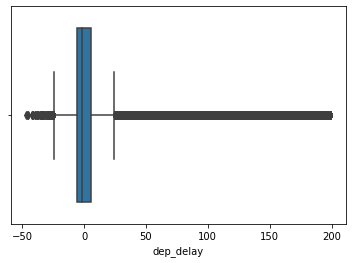

In [46]:
sns.boxplot(test1.dep_delay)
plt.show()

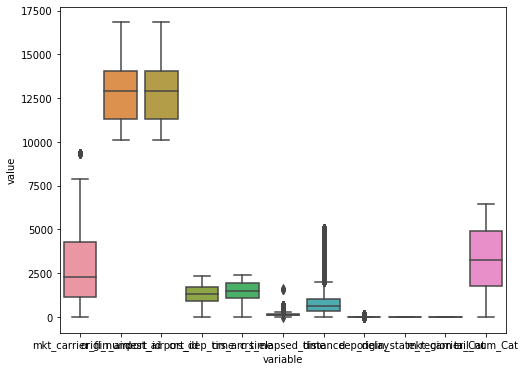

In [47]:
plt.figure(figsize=(8,6))
sns.boxplot(x="variable", y="value", data=pd.melt(test1._get_numeric_data()))
plt.show()

In [48]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import statsmodels.api as sm

In [58]:
df_sca.head()

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,dep_delay,origin_state_region,tail_num_Cat,month,...,dayof_theweek_5,dayof_theweek_6,Nos flight per airport_1,Nos flight per airport_2,Nos flight per airport_3,Nos flight per airport_4,Nos_flight/carrier in airport_1,Nos_flight/carrier in airport_2,Nos_flight/carrier in airport_3,Nos_flight/carrier in airport_4
0,0.134571,0.603405,0.759082,0.091515,0.103504,0.010863,-0.000338,0.000056,0.097369,0.000507,...,0.000000,0.0,0.0,0.0,0.0,0.000056,0.0,0.0,0.0,0.000056
1,0.142394,0.689837,0.668990,0.102951,0.122255,0.011582,-0.000193,0.000064,0.117236,0.000772,...,0.000064,0.0,0.0,0.0,0.0,0.000064,0.0,0.0,0.0,0.000064
2,0.282665,0.575148,0.757601,0.034066,0.044688,0.006330,-0.000912,0.000054,0.020386,0.000215,...,0.000000,0.0,0.0,0.0,0.0,0.000054,0.0,0.0,0.0,0.000054
3,0.131426,0.566327,0.780265,0.038826,0.059057,0.021288,-0.000211,0.000053,0.190695,0.000317,...,0.000000,0.0,0.0,0.0,0.0,0.000053,0.0,0.0,0.0,0.000053
4,0.141884,0.573799,0.789275,0.038000,0.055715,0.020927,0.001070,0.000054,0.104955,0.000054,...,0.000054,0.0,0.0,0.0,0.0,0.000054,0.0,0.0,0.0,0.000054


In [59]:
new_df._get_numeric_data().head()

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,dep_delay,origin_state_region,tail_num_Cat,month,...,dayof_theweek_5,dayof_theweek_6,Nos flight per airport_1,Nos flight per airport_2,Nos flight per airport_3,Nos flight per airport_4,Nos_flight/carrier in airport_1,Nos_flight/carrier in airport_2,Nos_flight/carrier in airport_3,Nos_flight/carrier in airport_4
0,2391,10721,13487,1626,1839,193.0,-6.0,1,1730,9,...,0,0,0,0,0,1,0,0,0,1
1,2213,10721,10397,1600,1900,180.0,-3.0,1,1822,12,...,1,0,0,0,0,1,0,0,0,1
2,5269,10721,14122,635,833,118.0,-17.0,1,380,4,...,0,0,0,0,0,1,0,0,0,1
3,2488,10721,14771,735,1118,403.0,-4.0,1,3610,6,...,0,0,0,0,0,1,0,0,0,1
4,2651,10721,14747,710,1041,391.0,20.0,1,1961,1,...,1,0,0,0,0,1,0,0,0,1


In [147]:
X=new_df._get_numeric_data().drop(columns='dep_delay')
y=new_df._get_numeric_data().dep_delay

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75)

In [149]:
X_train.shape

(737481, 36)

In [91]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dep_delay   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     307.6
Date:                Thu, 27 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:35:15   Log-Likelihood:            -3.8977e+06
No. Observations:              737481   AIC:                         7.796e+06
Df Residuals:                  737442   BIC:                         7.796e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
mkt_carrier_fl_num                  0.0005   3.25e-05     15.129      0.000       0.000       0.001
origin_airport_id               -3.234e-05   3.92e-05     -0.825      0.409      -0.000    4.45e-05
dest_airport_id                  1.581e-06   3.75e-05      0.042      0.966   -7.19e-05     7.5e-05
crs_dep_time                        0.0054      0.000     17.530      0.000       0.005       0.006
crs_arr_time                        0.0019      0.000     11.216      0.000       0.002       0.002
crs_elapsed_time                    0.0171      0.001     20.199      0.000       0.015       0.019
mkt_carrier_Cat                     0.2679      0.015     17.954      0.000       0.239       0.297
tail_num_Cat                       -0.0002   3.08e-05     -4.890      0.000      -0.000   -9.02e-05
year                                0.9168      0.111      8.239      0.000       0.699       1.135
periodof_day_1                   -266.8414     32.092     -8.315      0.000    -329.740    -203.943
periodof_day_2                   -264.0597     32.091     -8.228      0.000    -326.957    -201.163
periodof_day_3                   -262.7332     32.091     -8.187      0.000    -325.631    -199.835
periodof_day_4                   -265.1283     32.092     -8.262      0.000    -328.027    -202.230
dayof_theweek_0                  -116.8233     14.263     -8.191      0.000    -144.779     -88.868
dayof_theweek_1                  -118.5929     14.263     -8.314      0.000    -146.549     -90.637
dayof_theweek_2                  -119.0048     14.263     -8.344      0.000    -146.959     -91.050
dayof_theweek_3                  -116.6022     14.263     -8.175      0.000    -144.557     -88.647
dayof_theweek_4                  -116.6352     14.264     -8.177      0.000    -144.591     -88.679
dayof_theweek_5                  -236.2899     28.525     -8.283      0.000    -292.199    -180.381
dayof_theweek_6                  -234.8142     28.525     -8.232      0.000    -290.723    -178.905
Nos flight per airport_1         -265.2342     32.097     -8.263      0.000    -328.144    -202.325
Nos flight per airport_2         -263.9205     32.094     -8.223      0.000    -326.823    -201.018
Nos flight per airport_3         -264.5142     32.092     -8.242      0.000    -327.413    -201.615
Nos flight per airport_4         -265.0935     32.089     -8.261      0.000    -327.988    -202.199
Nos_flight/carrier in airport_1  -263.9388     32.096     -8.224      0.000    -326.845    -201.033
Nos_flight/carrier in airport_2  -264.2454     32.091     -8.234      0.000    -327.143    -201.348
Nos_flight/carrier in airport_3  -265.2517     32.091     -8.266      0.000    -328.148    -202.355
Nos_flight/carrier in airport_4  -265.3265     32.091     -8.268      0.000    -328

In [150]:
lin = LinearRegression()
lin = lin.fit(X_train,y_train)
y_pred = lin.predict(X_test)

In [102]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))

2265.7663011167565
0.012123151231655416


In [65]:
error_ana = X_test.reset_index(drop= True)
error_ana['error'] = y_pred - y_test 

In [79]:
# error_ana[error_ana.error < -200].sort_values()

In [75]:
error_ana.describe()

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,origin_state_region,tail_num_Cat,month,year,...,dayof_theweek_6,Nos flight per airport_1,Nos flight per airport_2,Nos flight per airport_3,Nos flight per airport_4,Nos_flight/carrier in airport_1,Nos_flight/carrier in airport_2,Nos_flight/carrier in airport_3,Nos_flight/carrier in airport_4,error
count,245827.000000,245827.000000,245827.000000,245827.000000,245827.000000,245827.000000,245827.000000,245827.000000,245827.000000,245827.000000,...,245827.000000,245827.000000,245827.000000,245827.000000,245827.000000,245827.000000,245827.000000,245827.000000,245827.00000,61550.000000
mean,2726.579953,12680.240722,12677.386764,1329.752151,1484.543309,138.347399,2.837837,3295.224699,6.589585,2018.505384,...,0.142059,0.006757,0.021381,0.078730,0.893132,0.011756,0.044133,0.107401,0.83671,-0.164177
std,1861.804182,1523.102512,1522.061523,489.052808,516.060488,72.020007,0.996678,1831.761793,3.398183,0.499972,...,0.349112,0.081922,0.144651,0.269318,0.308946,0.107787,0.205390,0.309623,0.36963,43.951491
min,1.000000,10135.000000,10135.000000,1.000000,1.000000,-37.000000,1.000000,0.000000,1.000000,2018.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1232.553182
25%,1120.000000,11292.000000,11292.000000,915.000000,1100.000000,87.000000,2.000000,1752.000000,4.000000,2018.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,2.234828
50%,2311.000000,12889.000000,12889.000000,1320.000000,1512.000000,120.000000,3.000000,3267.000000,7.000000,2019.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,10.458288
75%,4301.000000,14057.000000,14057.000000,1735.000000,1915.000000,168.000000,4.000000,4919.500000,10.000000,2019.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,16.404846
max,9392.000000,16869.000000,16869.000000,2359.000000,2400.000000,1552.000000,4.000000,6442.000000,12.000000,2019.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,143.167474


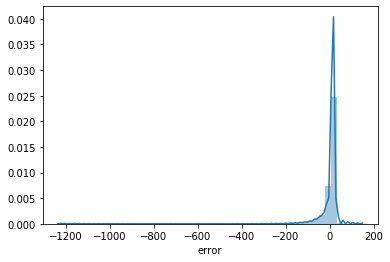

In [68]:
sns.distplot(error_ana['error'])

In [151]:
rr = Ridge(alpha=100)
rr.fit(X_train,y_train)
y_rr = rr.predict(X_test)

In [152]:
print(metrics.r2_score(y_test,y_rr))
print(metrics.mean_squared_error(y_test,y_rr))

0.012691181475997793
2387.3163665322495


In [173]:
X_test.shape

(245827, 36)

### for flight_test

In [183]:
with open('X_predict.csv') as k:
    test_x = pd.read_csv(k)    

In [184]:
test_x.head()

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,mkt_carrier_Cat,tail_num_Cat,fl_date,origin,...,Nos_flight/carrier in airport_1,Nos_flight/carrier in airport_2,Nos_flight/carrier in airport_3,Nos_flight/carrier in airport_4,origin_state_region_1,origin_state_region_2,origin_state_region_3,origin_state_region_4,WEEKEND_0.0,WEEKEND_1.0
0,5888,13891,14771,1810,1945,95,9,5513,2020-01-01,ONT,...,0,0,0,1,0,0,0,1,1,0
1,6276,13891,14771,1150,1320,90,9,2243,2020-01-01,ONT,...,0,0,0,1,0,0,0,1,1,0
2,4598,13891,14831,2020,2130,70,9,4013,2020-01-01,ONT,...,0,0,0,1,0,0,0,1,1,0
3,4761,13891,14831,1340,1455,75,9,2602,2020-01-01,ONT,...,0,0,0,1,0,0,0,1,1,0
4,5162,13891,14831,915,1035,80,9,5636,2020-01-01,ONT,...,0,0,0,1,0,0,0,1,1,0


In [185]:
y_predict = rr.predict(test_x._get_numeric_data())

In [186]:
y_predict_df = pd.DataFrame(y_predict,columns=['predicted_delay'])
y_predict_df.head()

,predicted_delay
0,16.702147
1,8.306527
2,17.370983
3,11.355477
4,5.495682


In [187]:
sample = test_x.join(y_predict_df)

In [188]:
to_show =['fl_date','mkt_carrier','origin','dest','predicted_delay']

In [190]:
sample[to_show].to_csv('sample_submission.csv',index = False)

In [160]:
sample.columns

Index(['mkt_carrier_fl_num', 'origin_airport_id', 'dest_airport_id',
       'crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'mkt_carrier_Cat',
       'tail_num_Cat', 'month', 'year', 'day', 'periodof_day_1',
       'periodof_day_2', 'periodof_day_3', 'periodof_day_4', 'dayof_theweek_0',
       'dayof_theweek_1', 'dayof_theweek_2', 'dayof_theweek_3',
       'dayof_theweek_4', 'dayof_theweek_5', 'dayof_theweek_6',
       'Nos flight per airport_1', 'Nos flight per airport_2',
       'Nos flight per airport_3', 'Nos flight per airport_4',
       'Nos_flight/carrier in airport_1', 'Nos_flight/carrier in airport_2',
       'Nos_flight/carrier in airport_3', 'Nos_flight/carrier in airport_4',
       'origin_state_region_1', 'origin_state_region_2',
       'origin_state_region_3', 'origin_state_region_4', 'WEEKEND_0.0',
       'WEEKEND_1.0', 'predicted'],
      dtype='object')

### Lasso

In [71]:
las = Lasso(alpha=0.1)
las.fit(X_train,y_train)
y_las = las.predict(X_test)

In [72]:
print(metrics.r2_score(y_test,y_las))
print(metrics.mean_squared_error(y_test,y_las))

0.014307492227362606
2130.03291330143


In [103]:
rand = RandomForestRegressor(random_state= 15)
rand = rand.fit(X_train,y_train)
y_predr = rand.predict(X_test)

In [ ]:
print(metrics.r2_score(y_test,y_predr))
print(metrics.mean_squared_error(y_test,y_predr))

In [80]:
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
svr =  SVR(kernel='rbf')
svr = svr.fit(X_train,y_train)
y_predsvr= svr.predict(X_test)

In [ ]:
print(metrics.r2_score(y_test,y_predsvr))    
print(metrics.mean_squared_error(y_test,y_predsvr))

In [ ]:
xgb = XGBRegressor()
xgb = xgb.fit(X_train,y_train)
y_predxgb= xgb.predict(X_test)

In [ ]:
np.random.seed(10)
parameter_candidates = [
  {'n_estimators':np.random.randint(100,1000,5), 'max_depth': np.random.randint(2,15,5)}]

In [ ]:
# grid_RFR = GridSearchCV(rand, param_grid=parameter_candidates,cv=5)
# grid_RFR.fit(X_train,y_train)

In [ ]:
# grid_RFR.best_params_

In [ ]:
def eliminateCorrFeatures(coef_, df):
    """
    coef_ should be between 0 and 1
    """
    df_corr = df.corr().abs()
    indices = np.where(df_corr > coef_) 
    indices = [(df_corr.index[x], df_corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
    for idx in indices: #each pair
        try:
            df.drop(idx[1], axis = 1, inplace=True)
        except KeyError:
            pass
    return df

In [ ]:
df = eliminateCorrFeatures(0.8, flights_19a)

In [ ]:
df